In [1]:
# 필요한 패키지 import 하기
import os                             # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2                            # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt       # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np                    # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib                           # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 
import copy

# Step 1. 파일 불러오기

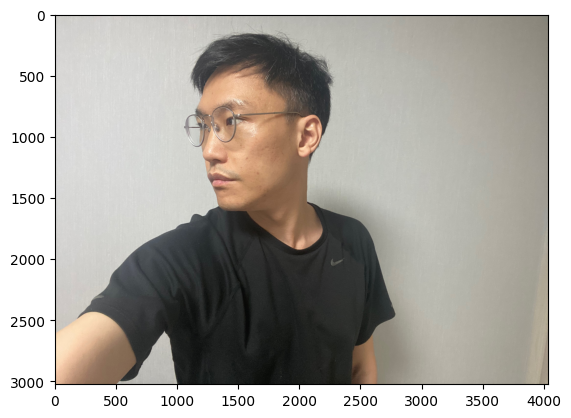

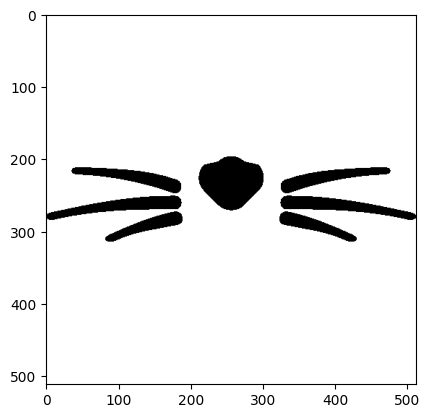

In [2]:
# 내가 사용한 이미지 파일 이름 : test1.jpeg, test2.jpeg, test3.jpeg, dark.jpg, far.jpg, out.jpeg, side1.jpeg, side2.jpeg, side3.jpeg, bed1.jpeg, bed2.jpeg

# 나의 사진 및 스티커 경로
# image_path = os.getenv("HOME") + "/aiffel/LMS/Exploration/[Exp_07] 스티커앱 만들기/data/test1.jpeg"      
# sticker_path = os.getenv("HOME") + "/aiffel/LMS/Exploration/[Exp_07] 스티커앱 만들기/data/mustache.png"

# 로컬 주피터 경로
image_path = "/Users/hyunhonoh/MyDeveloper/Aiffel/exploration/Exp_07/data/side1.jpeg"      
sticker_path = "/Users/hyunhonoh/MyDeveloper/Aiffel/exploration/Exp_07/data/mustache.png"


# 이미지 불러오기
img_bgr = cv2.imread(image_path)                              # OpenCV로 이미지를 불러옵니다
img_rgb_original = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)   # OpenCV에서 BRG로 로드된 이미지를 RGB로 변환
img_rgb_show = img_rgb_original.copy()                        # 출력용 이미지를 따로 보관함


# 스티커 불러오기
sticker_bgr = cv2.imread(sticker_path)                             # OpenCV로 스티커를 불러옵니다
sticker_original = cv2.cvtColor(sticker_bgr, cv2.COLOR_BGR2RGB)    # OpenCV에서 BRG로 로드된 스티커를 RGB로 변환
sticker_rgb = sticker_original.copy()


# 이미지, 스티커 출력
plt.imshow(img_rgb_original)                                  # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show()                                                    # 이미지를 출력해준다. (실제 출력)      
plt.imshow(sticker_original)                                  # 스티커를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show()                                                    # 스티커를 출력해준다. (실제 출력)

# Step 2. 얼굴 검출 & 랜드마크 검출

## 얼굴 사각형으로 검출

In [3]:
# 얼굴 찾기
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()    # 기본 얼굴 감지기를 반환
# detector_hog = dlib.cnn_face_detection_model_v1()
dlib_rects = detector_hog(img_rgb_original, 1)     # (image, upsampling 횟수)

# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)                                  # 찾은 얼굴 영역의 좌표

rectangles[[(936, 617) (1895, 1576)]]


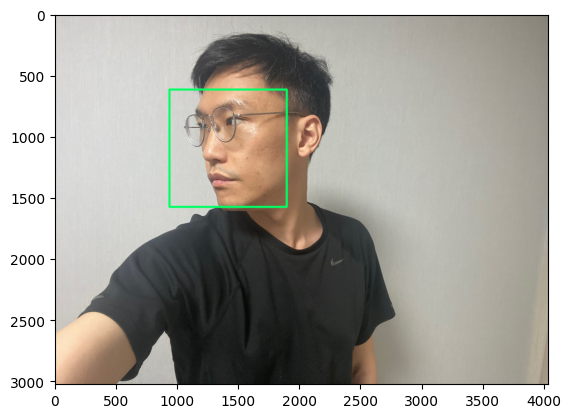

In [4]:
for dlib_rect in dlib_rects:               # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left()                   # 왼쪽
    t = dlib_rect.top()                    # 위쪽
    r = dlib_rect.right()                  # 오른쪽
    b = dlib_rect.bottom()                 # 아래쪽

    cv2.rectangle(img_rgb_show, (l,t), (r,b), (0,255,100), 15, lineType=cv2.LINE_AA)     # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
                                                                                         # 사각형 왼쪽위 시작점 좌표 : 두 번째 인자
                                                                                         # 사각형 오른쪽 아래 종료점 좌표 : 세 번째 인자
                                                                                         # 컬러 : 네 번째 인자
                                                                                         # 선 두께 : 다섯번째 인자

plt.imshow(img_rgb_show)
plt.show()

## LandMark 검출

In [5]:
# Dlib은 ibug 300-W 데이터셋으로 학습한 pretrained model 을 제공함
# 공개되어 있는 weight file을 다운로드 받음
# 해당 모델파일은 bz2 압축파일 형태로 제공되어 압축을 풀어준 후 사용하겠음

# 주피터 로컬 경로에서 압축해제
# !python -m wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
# !mv shape_predictor_68_face_landmarks.dat.bz2 ~/MyDeveloper/Aiffel/exploration/Exp_07/models
# !cd ~/MyDeveloper/Aiffel/exploration/Exp_07 && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2  # bzip2 압축파일 푸는 명령어

In [6]:
# 저장한 landmark 모델의 주소를 model_path 변수에 저장
model_path = os.getenv('HOME') + '/MyDeveloper/Aiffel/exploration/Exp_07/models/shape_predictor_68_face_landmarks.dat'


# 모델 불러오기
# dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
# dlib.rectangle: 내부를 예측하는 박스
# dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
# 객체 landmark_predictor는 RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환합니다.
landmark_predictor = dlib.shape_predictor(model_path)


# 랜드마크의 위치를 저장할 list 생성  
list_landmarks = []
  

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    # 모든 landmark의 위치정보를 points 변수에 저장
    points = landmark_predictor(img_rgb_original, dlib_rect)
    print("Landmark 검출 됐는지 확인 :\n", points.parts())
    
    # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))       # 얼굴 하나당 하나의 리스트를 만듦      
                                                                        # point 객체에서 x, y를 뽑아 리스트로 변환
    # list_landmarks에 랜드마크 리스트를 저장
    list_landmarks.append(list_points)

    
# 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
# 각 원소는 68개의 랜드마크 위치가 나열된 list 
# list_landmarks의 원소(얼굴)가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생
print()
print(len(list_landmarks[0]))

Landmark 검출 됐는지 확인 :
 points[(1165, 990), (1162, 1069), (1177, 1154), (1213, 1240), (1250, 1325), (1277, 1405), (1311, 1502), (1349, 1586), (1424, 1614), (1529, 1603), (1647, 1553), (1764, 1473), (1867, 1375), (1941, 1254), (1968, 1109), (1968, 963), (1964, 820), (1132, 814), (1145, 798), (1167, 790), (1200, 792), (1230, 806), (1327, 772), (1400, 726), (1491, 702), (1584, 701), (1683, 733), (1289, 898), (1279, 980), (1265, 1061), (1250, 1144), (1242, 1198), (1268, 1213), (1302, 1218), (1344, 1207), (1389, 1191), (1164, 934), (1180, 905), (1219, 899), (1260, 923), (1222, 941), (1185, 946), (1457, 888), (1489, 847), (1542, 834), (1604, 844), (1555, 877), (1503, 889), (1302, 1373), (1273, 1328), (1284, 1306), (1308, 1313), (1334, 1304), (1405, 1324), (1503, 1361), (1426, 1407), (1364, 1422), (1334, 1424), (1308, 1423), (1295, 1402), (1315, 1369), (1294, 1352), (1317, 1352), (1343, 1350), (1478, 1364), (1348, 1360), (1322, 1362), (1299, 1358)]

68


# STEP 3. 스티커 적용 위치 확인하기

In [21]:
# 확인용
# 퍼실님 이 셀은 그냥 넘어가도 되는 셀입니다

# list_landmarks의 원소(얼굴)가 1개이므로 아래 반복문은 한번만 실행됨
# position_number = 0
# for landmark in list_landmarks:
#     for point in landmark:
#         img_rgb_show_landmark = img_rgb_original.copy()
#         # cv2.circle: OpenCV의 원을 그리는 함수
#         # img_show 이미지 위 각각의 point에
#         # 원의 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
#         # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)
#         cv2.circle(img_rgb_show_landmark, point, 20, (0, 255, 255), -1)
#         cv2.putText(img_rgb_show_landmark, str(position_number), point, cv2.FONT_HERSHEY_SIMPLEX, 10, (255,0,0), 10)
#         plt.figure(figsize=(7, 7))
#         plt.imshow(img_rgb_show_landmark)
#         plt.show()
#         position_number += 1

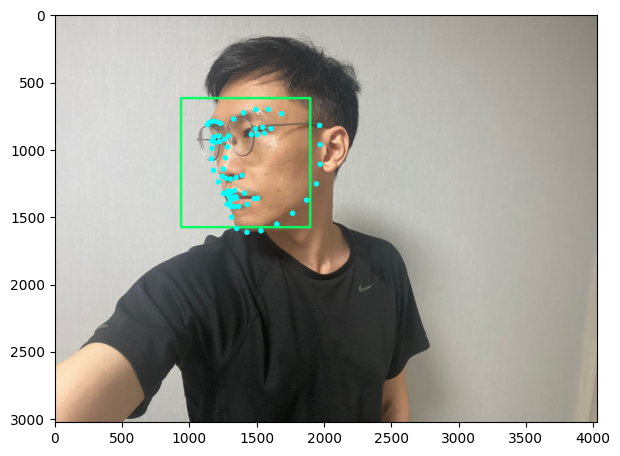

In [7]:
# 전체 landmark 한 번에 보기
img_rgb_show_landmark = img_rgb_show.copy()
for landmark in list_landmarks:
    for point in landmark:
        # cv2.circle: OpenCV의 원을 그리는 함수
        # img_show 이미지 위 각각의 point에
        # 원의 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
        # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)
        cv2.circle(img_rgb_show_landmark, point, 20, (0, 255, 255), -1)

plt.figure(figsize=(7, 7))
plt.imshow(img_rgb_show_landmark)
plt.show()

# STEP 4. 스티커가 적용될 위치를 Landmark를 사용해서 계산하기

(1302, 1218)
인중 부위 (x,y) : (1302,1218)
사각형 폭, 높이 (w,h) : (960,960)


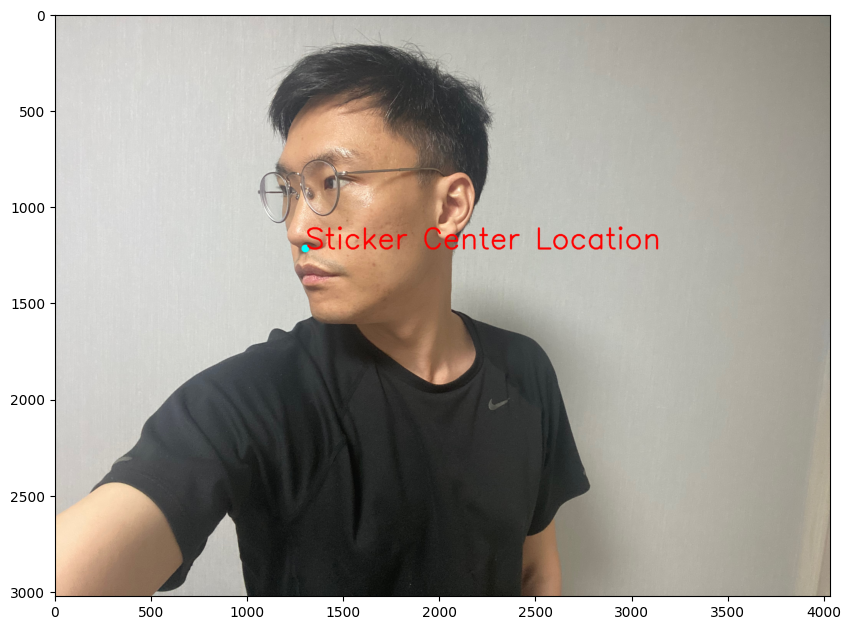

In [8]:
# dlib_rects : 얼굴 영역을 저장하고 있는 값 → rectangles[[(1469, 937) (2427, 1895)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y)) → [[(1417, 1171), (1425, 1310), (1441, 1447), (1469, 1580), (1521, 1700), (1935, 1693), (1890, 1688)]]
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):     # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33])                                         # 인중의 index는 33 입니다
    x = landmark[33][0]                                          # 이미지에서 인중 부위의 x값
    y = landmark[33][1]                                          # 이미지에서 인중 부위의 y값
    w = h = dlib_rect.width()                                   # 얼굴 영역의 가로를 차지하는 픽셀의 수 (2427-1469+1) → max(x) - min(x) + 1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print ('인중 부위 (x,y) : (%d,%d)' % (x,y))
    print ('사각형 폭, 높이 (w,h) : (%d,%d)' % (w,h))
    
    img_rgb_sticker_location = img_rgb_original.copy()
    cv2.circle(img_rgb_sticker_location, (x, y), 20, (0, 255, 255), -1)
    cv2.putText(img_rgb_sticker_location, "Sticker Center Location", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 5, (255,0,0), 10)
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb_sticker_location)
    plt.show()

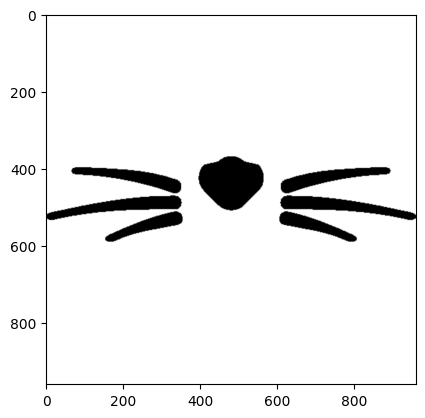

In [9]:
# 스티커 리사이즈
sticker_rgb = cv2.resize(sticker_rgb, (w,h))
plt.imshow(sticker_rgb)

In [10]:
# 스티커 사이즈 조절하기

# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 귀 부위의 x값 = 1927
# y는 이미지에서 귀 부위의 y값 = 1086
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 959
# h는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 959


# 스티커의 왼쪽 위 지점을 이미지 상에 놓을 좌표
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y 값에서 왕관 이미지가 시작됨
refined_x = x - w // 2                   # 1927 - 959/2= 1927-480 = 1447
refined_y = y - h // 2                       # 1086 - 959 = 127


# 우리는 현재 이마 자리에 왕관을 두고 싶은건데, 이마위치 - 왕관 높이를 했더니 이미지의 범위를 초과하여 음수가 나오는 것
# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.
print ('스티커 왼쪽 상단을 이미지에 놓을 좌표 (x,y) : (%d,%d)'%(refined_x, refined_y)) # 음수 발생 : 이미지 범위를 벗어남


# 스티커가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 왕관 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.
if refined_x < 0: 
    sticker_rgb = sticker_rgb[:, -refined_x:]       # 스티커 이미지의 음수 영역를 자름
    refined_x = 0
    
# 스티커를 씌우기 위해 스티커 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    sticker_rgb = sticker_rgb[-refined_y:, :]       # 스티커 이미지의 음수 영역를 자름
    refined_y = 0                                   # 스티커의 시작지점의 높이를 0으로 변경해야 함

print ('잘려진 스티커의 새로운 왼쪽상단 시작점 (x,y) : (%d,%d)'%(refined_x, refined_y))

스티커 왼쪽 상단을 이미지에 놓을 좌표 (x,y) : (822,738)
잘려진 스티커의 새로운 왼쪽상단 시작점 (x,y) : (822,738)


# STEP 5. 스티커 적용하기

(1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.

(2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다. opencv 의 cv2.addWeighted() 를 참고하세요.

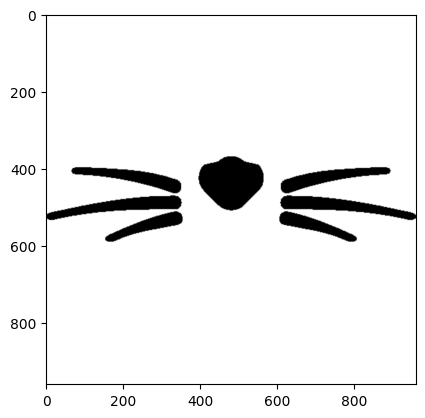

In [11]:
# 확인용
plt.imshow(sticker_rgb)

## 5.1 투명도 적용 아니한 경우

In [12]:
# sticker_attaching_orginal_area 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 입니다.
sticker_attaching_orginal_area = img_rgb_original[refined_y : refined_y+sticker_rgb.shape[0], refined_x : refined_x+sticker_rgb.shape[1]].copy()  # 원본이미지의 크롭 부분
                                                                                                                                                 # 슬라이싱은 얕은 복사 - 주소값만 가져오기, not creating new objects
                                                                                                                                                  # copy는 깊은 복사 - 새로 객체를 만들고 그 객체의 주소를 가져오
img_rgb_show[refined_y:refined_y+sticker_rgb.shape[0], refined_x:refined_x+sticker_rgb.shape[1]] = \
    np.where(sticker_rgb==255, sticker_attaching_orginal_area, sticker_rgb).astype(np.uint8)   # 스티커 이미지 행렬에서 0인 부분은 원본 이미지에서 이미지값을 가져오고 0이 아니면 스티커 이미지에서 이미지 값을 가져오기 
                                                                                               # 슬라이싱이므로 주소값만 가져오는것이라서 =의 왼쪽 코드는 =의 오른쪽 코드를 =의 왼쪽인 원본이미지에 덮어쓰기라는 말

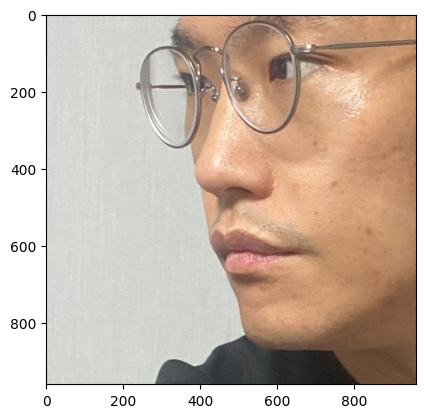

In [13]:
# 확인용
# 원본 이미지 크롭한 영역
plt.imshow(sticker_attaching_orginal_area)

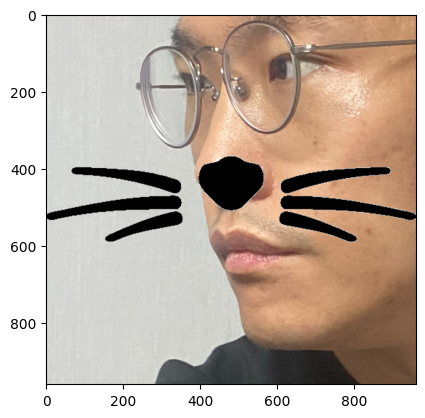

In [14]:
# 확인용
# 원본 크롭 부분과 스티커 합성
plt.imshow(np.where(sticker_rgb==255, sticker_attaching_orginal_area, sticker_rgb).astype(np.uint8))

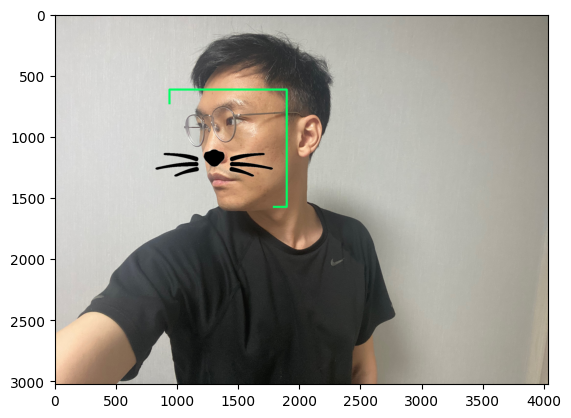

In [15]:
# 확인용
plt.imshow(img_rgb_show)

## 5.2 투명도 적용한 경우

In [16]:
alpha = 0.6
beta = 1 - alpha
img_weighted = cv2.addWeighted(sticker_attaching_orginal_area, alpha, sticker_rgb, beta, 0)

# sticker_attaching_orginal_area 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 입니다.
sticker_attaching_orginal_area = img_rgb_original[refined_y : refined_y+sticker_rgb.shape[0], refined_x : refined_x+sticker_rgb.shape[1]].copy()  # 원본이미지의 크롭 부분
                                                                                                                                                 # 슬라이싱은 얕은 복사 - 주소값만 가져오기, not creating new objects
                                                                                                                                                  # copy는 깊은 복사 - 새로 객체를 만들고 그 객체의 주소를 가져오
img_rgb_show[refined_y:refined_y+sticker_rgb.shape[0], refined_x:refined_x+sticker_rgb.shape[1]] = \
    np.where(sticker_rgb==255, sticker_attaching_orginal_area, img_weighted).astype(np.uint8)   # 스티커 이미지 행렬에서 0인 부분은 원본 이미지에서 이미지값을 가져오고 0이 아니면 스티커 이미지에서 이미지 값을 가져오기 
                                                                                                # 슬라이싱이므로 주소값만 가져오는것이라서 =의 왼쪽 코드는 =의 오른쪽 코드를 =의 왼쪽인 원본이미지에 덮어쓰기라는 말

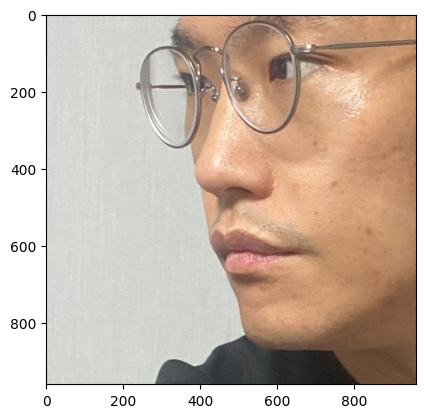

In [17]:
# 확인용
# 원본 이미지 크롭한 영역
plt.imshow(sticker_attaching_orginal_area)

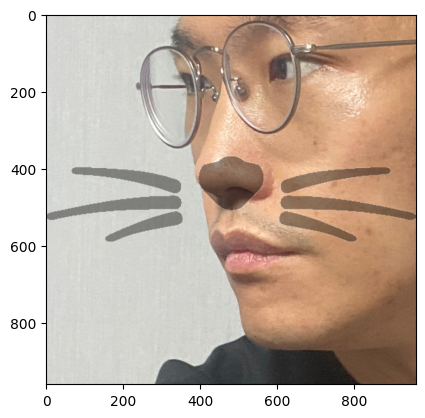

In [18]:
# 확인용
# 원본 크롭 부분과 스티커 합성
plt.imshow(np.where(sticker_rgb==255, sticker_attaching_orginal_area, img_weighted).astype(np.uint8))

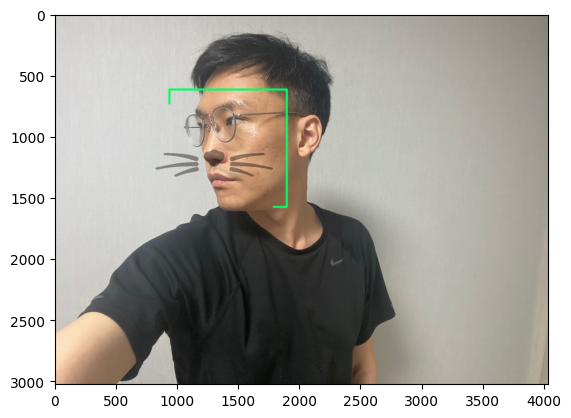

In [19]:
# 스티커를 적용한 이미지를 보여준다.
plt.imshow(img_rgb_show)

plt.show()

## 5.3 원본 이미지에 스티커 적용

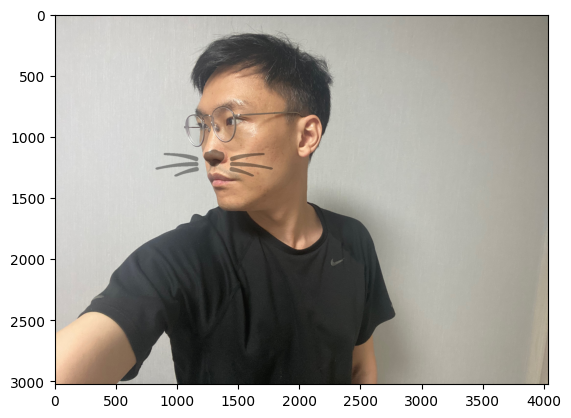

In [20]:
sticker_attaching_orginal_area = img_rgb_original[refined_y : refined_y+sticker_rgb.shape[0], refined_x : refined_x+sticker_rgb.shape[1]].copy()


# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다.
img_rgb_original_show = copy.deepcopy(img_rgb_original)                                        # 원본 이미지를 깊은복사해서 새로운 변수에 할당
img_rgb_original_show[refined_y:refined_y+sticker_rgb.shape[0], refined_x:refined_x+sticker_rgb.shape[1]] = \
    np.where(sticker_rgb==255, sticker_attaching_orginal_area, img_weighted).astype(np.uint8)
plt.imshow(img_rgb_original_show)                                                              # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

# STEP 6. 문제점 찾아보기

(1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.

(2) 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!

**오늘 만든 스티커앱에서 생각해볼 수 있는 문제점은 다음과 같습니다**  

    1. 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
    
        - 왼쪽으로 쳐다보는 경우 : 
            얼굴 각도가 변해도 검출 모델은 얼굴의 각 위치에 대한 Landmark는 정확히 검출했다. 
            그러나 스티커는 얼굴의 각도에 따른 변형이 없어서 입체적으로 보이지 못하였다. 
            이런 경우는 얼굴이 왼쪽을 처다보고 있으면 그에 따라 수염 스티커도 왼쪽의 수염의 길이를 줄이는 방법을 사용해야 한다.  
        - 오른쪽으로 쳐다보는 경우 : 
            얼굴 각도가 오른쪽으로 치우쳐졌을 때는 10 - 16번 landmark는 얼굴 범위에서 벗어나 검출되었다. 
            그 결과 수염의 중앙도 코의 인중에 위치하지 않게 되어 정화하게 위치하지 못했다. 또한 오른쪽 수염 길이 또한 얼굴과 비율이 맞지 않아 이상하게 보임
        - 턱만 보이게 찍은 경우:
            얼굴 검출 모델이 얼굴 자체를 검출하지 못하였다. 그 결과 다음 코드로 진행하지 못하고 오류가 발생
        - 얼굴을 아래에서 위로 극단적으로 찍은 경우:
            마찬가지로 얼굴 검출 모델이 얼굴 자체를 검출하지 못하였음
            
    2. 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
        - 옆으로 누워서 촬영한 경우
            얼굴을 검출하지 못했음. 
            얼굴의 일부 요소가 검출시에 부족하면 검출기가 제대로 검출을 못하는 문제가 발생함. 
        - 멀리서 촬영한 경우
            멀리서 촬영하여 얼굴 검출이 잘되었고 콧수염 스티커도 잘 부착되었다. 왜 안된다는지 모르겠습니다
    3. 실행 속도가 중요할까요?
        - 단순히 이미지 한 장에 스티커 부착하는 것은 실행 속도에 큰 영향을 받지 않겠지만, 영상촬영 또는 실시간으로 스티커가 나의 얼굴에 적용되어야 하는 경우라면 실행 속도는 중요하다. 움지기는 순간마다 얼굴의 위치를 검출하면서 landmark도 찍어야하고 그 와중에 얼굴 인중으로부터 스티커의 왼쪽 위 점과의 관계를 계산해야하기 때문이다
    4. 스티커앱을 만들 때 정확도가 얼마나 중요할까요?
        - 정확도는 높을수록 좋다. 다만 높게 만든다는 것은 그 만큼 계산량이 많아진다는 것이므로 빠르게 계산되는 것에 비중을 둔다면 정확도와 Trade-off로 타협을 해야한다


# STEP 7. 회고

1. 이번 프로젝트에서 어려웠던 점 
    - 이미지의 원본을 복사한 다른 변수 이름을 사용하다보니 코드의 어느 시점에서는 무엇이 어떤 변수인지 헷갈리는 경우가 많았다.
    - 스티커를 부착하는데 좌표계산을 해야했는데 큰 틀에서 보면 간단한 원리지만 직접 하나씩 생각해보면서 수행하다보면 헷갈려서 이해하는데 어려웠다
    - dlib.get_frontal_face_detector로는 정면 얼굴에 대해서는 검출이 잘되었다. 그러나 촬영 각도가 아래에서 되었거나 턱만 보여지는 사진에서는 얼굴 검출을 할 수 없어 코드 진행이 안되었다
    
    
2. 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점
    - 이미지의 숫자 값이 색상을 나타내는 것을 이론적으로 알고만 있었지 실제 적용해보니 어떤 방식으로 실행되는지 알 수 있었다.
    - 멀리서 찍은 사진에 대해서는 얼굴 검출이 잘 안된다는 문제가 있다고 했는데 실제로 멀리서 찍힌 얼굴에 대한 검출이 정확하였다. 어떤 부분에서 안된다는지 모르겠다


3. 루브릭 평가 지표를 맞추기 위해 시도한 것들
    - 얼굴 검출과 landmark를 잘 검출하였고, 각 지점마다 텍스트로 표시하여 사진을 출력했다
    - 스티커를 정확한 위치에 놓았다
    - 투명도를 조절하고 실제 사진과 결합할 때 np.where()에서 조합하는 방식을 고민하고 결과로 내놓았다
    - 가능한 문제점에 대해서 여러 가지 사진으로 실험하였고 얼굴 검출이 안되는 상황에 대해서 알아보았다. 그러나 멀리있는 얼굴에 대해서는 잘 검출하여 어떤 부분이 문제인지는 더 알아봐야 한다
    
4. 만약에 루브릭 평가 관련 지표를 달성 하지 못했을 때, 이유에 관한 추정  
    - 달성함

    
5. 자기 다짐
     - 자연어 처리보다 이미지 처리 분야가 더 쉽다고하는데 실제로 CV를 진행하면서 항상 어려움을 느끼고 있다. 부족한 이미지 처리에 대한 지식을 쌓아야겠다
    

